<a href="https://colab.research.google.com/github/park-geun-hyeong/Computer_Vision/blob/main/CH3/SSD_FaceDetection_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tensorflow, Keras DownGrade

In [ ]:
! pip install tensorflow==1.13.1
! pip install keras==2.2.1

import tensorflow as tf
import keras 

print(tf.__version__)
print(keras.__version__)

## Git Clone

In [2]:
! git clone http://github.com/chulminkw/DLCV

fatal: destination path 'DLCV' already exists and is not an empty directory.


## Library Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import cv2
import time

## Change Home directory for download

In [ ]:
os.mkdir('/content/DLCV/SSD')
os.chdir('/content/DLCV/SSD') 
os.getcwd()

##Pretrained_Model Download(SSD+MobilenNet)

In [ ]:
! wget https://github.com/yeephycho/tensorflow-face-detection/raw/master/model/frozen_inference_graph_face.pb

## Label Mapping

In [3]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}


## Face_Object_Detection

Instructions for updating:
Use tf.gfile.GFile.
person: 0.9964
person: 0.9951
person: 0.9914
person: 0.9911
person: 0.9904
person: 0.9882
person: 0.9877
person: 0.9761
person: 0.9755
person: 0.9740
person: 0.9667
person: 0.9640
person: 0.9592
person: 0.9587
person: 0.9544
person: 0.9442
person: 0.9213
person: 0.9006
person: 0.8964
person: 0.8853
person: 0.8644
person: 0.8461
person: 0.8405
person: 0.8310
person: 0.8242
person: 0.8194
person: 0.7923
person: 0.7840
person: 0.7827
person: 0.7746
person: 0.7604
person: 0.7434
person: 0.7191
person: 0.7108
person: 0.6926
person: 0.6902
person: 0.6755
person: 0.6551
person: 0.6531
person: 0.6243
person: 0.6139
person: 0.6107
person: 0.5777
person: 0.5726
person: 0.5613
person: 0.5372
person: 0.4968
person: 0.4912
person: 0.4825
person: 0.4727
person: 0.4676
person: 0.4638
person: 0.4384
person: 0.4296
person: 0.4189
person: 0.4108
person: 0.4002
running_time: 1.6078


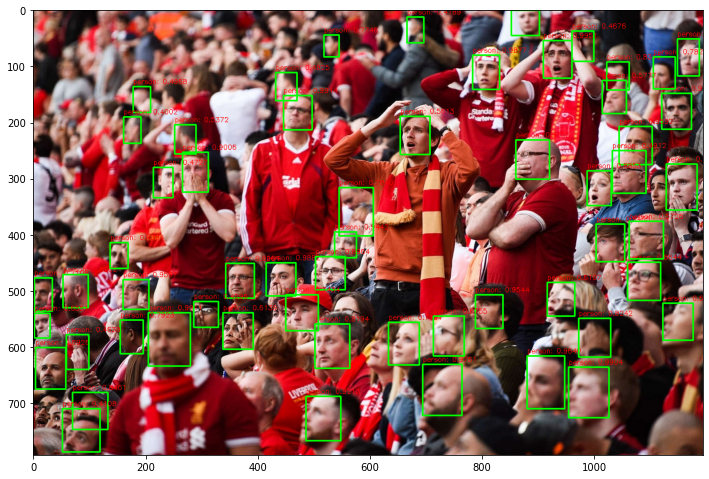

In [9]:
model_path = '/content/DLCV/SSD/frozen_inference_graph_face.pb'
img_path = '/content/DLCV/data/image/EPL01.jpg'

with tf.gfile.FastGFile(model_path,'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

with tf.Session() as sess:
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')

    img = cv2.imread(img_path)
    draw_img = img.copy()
    row = img.shape[0]
    col = img.shape[1]
    inp = cv2.resize(img,(300,300))
    inp = inp[:,:,[2,1,0]] ##BGR2RGB

    start = time.time()

    out=sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                  sess.graph.get_tensor_by_name('detection_scores:0'),
                  sess.graph.get_tensor_by_name('detection_boxes:0'),
                  sess.graph.get_tensor_by_name('detection_classes:0')],
                 feed_dict={'image_tensor:0': inp.reshape(1,inp.shape[0],inp.shape[1],3)})
    
    green=(0,255,0)
    red=(0,0,255)

    num_detection = int(out[0][0])

    for i in range(num_detection):
        classid = int(out[3][0][i])
        score = float(out[1][0][i])

        bbox = [float(v) for v in out[2][0][i]]

        if score>0.4:

            left = int(bbox[1]* col) 
            top  = int(bbox[0]* row) 
            right = int(bbox[3]* col)
            bottom = int(bbox[2]* row) 

            caption = '{}: {:.4f}'.format(labels_to_names[classid],score)
            print(caption)
            cv2.rectangle(draw_img, (left,top), (right, bottom), color=green, thickness=2)
            cv2.putText(draw_img, caption, (left, top-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=red, thickness=1)

    print('running_time: {:.4f}'.format(time.time()-start))

rgb_img = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(rgb_img)
plt.show()

##Functional

In [10]:
def create_detected_image(img_array,sess,copied_img=True):

    if copied_img:
        draw_img = img_array.copy()
    else:
        draw_img = img_array



    row = img_array.shape[0]
    col = img_array.shape[1] 
    inp = cv2.resize(img_array, (300,300))
    inp = inp[:,:,[2,1,0]]

    red = (0,0,255)
    green = (0,255,0)

    out=sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                sess.graph.get_tensor_by_name('detection_scores:0'),
                sess.graph.get_tensor_by_name('detection_boxes:0'),
                sess.graph.get_tensor_by_name('detection_classes:0')],
                feed_dict={'image_tensor:0': inp.reshape(1,inp.shape[0],inp.shape[1],3)})
        

    num_detection = int(out[0][0])
    start = time.time()

    for i in range(num_detection):
        classid = int(out[3][0][i])
        score = float(out[1][0][i])

        bbox = [float(v) for v in out[2][0][i]]

        if score>0.4:

            left = int(bbox[1]* col) 
            top  = int(bbox[0]* row) 
            right = int(bbox[3]* col)
            bottom = int(bbox[2]* row) 

            caption = '{}: {:.4f}'.format(labels_to_names[classid],score)
            cv2.rectangle(draw_img, (left,top), (right, bottom), color=green, thickness=2)
            cv2.putText(draw_img, caption, (left, top-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=red, thickness=1)

    print('running_time: {:.4f}'.format(time.time()-start))

    return draw_img
        

running_time: 0.0017


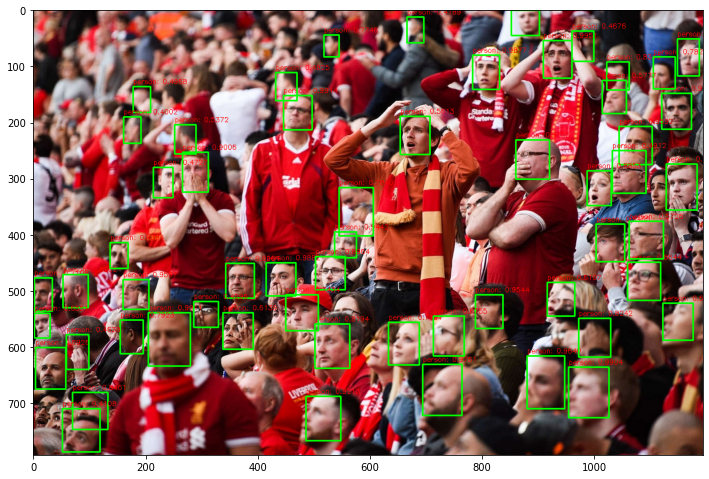

In [11]:
img_path = '/content/DLCV/data/image/EPL01.jpg'
model_path = '/content/DLCV/SSD/frozen_inference_graph_face.pb'
img = cv2.imread(img_path)

with tf.gfile.FastGFile(model_path,'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

with tf.Session() as sess:
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')

    draw_img = create_detected_image(img, sess,True)

rgb_img = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB) 
plt.figure(figsize=(12,12))
plt.imshow(rgb_img)
plt.show()

##Video Detection 

In [14]:
os.listdir("/content/DLCV/data/video")

['jack_and_raccoon.mp4',
 'FishnShark01.mp4',
 'balloon_dog01.mp4',
 'Pet_fight01.mp4',
 'NFL01.mp4',
 'London_Street.mp4',
 'balloon_dog02.mp4',
 'John_Wick_small.mp4',
 'InfiniteWar01.mp4',
 'Night_Day_Chase.mp4']

In [25]:
video_path = '/content/DLCV/data/video/InfiniteWar01.mp4'
output_path = '/content/DLCV/data/video/output_video.avi'

cap = cv2.VideoCapture(video_path)
codec = cv2.VideoWriter_fourcc(*'XVID')

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
vid_fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print('vid_size: {}, vid_fps: {}, frame_cnt: {}'.format(vid_size, vid_fps, frame_cnt))

vid_size: (1216, 676), vid_fps: 28, frame_cnt: 455


In [ ]:
vid_out = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)
model_path = '/content/DLCV/SSD/frozen_inference_graph_face.pb'


with tf.gfile.FastGFile(model_path,'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

with tf.Session() as sess:
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')    

    while True:
        has_img, img_frame = cap.read()
        if not has_img:
            print('no more frame')
            break

        draw_frame = create_detected_image(img_frame, sess, False)
        vid_out.write(draw_frame)

vid_out.release()
cap.release()